In [114]:
import pandas as pd
import matplotlib.pyplot as plt
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

In [2]:
#Write a Python program to display first 5 rows from COVID-19 dataset. 
#Also print the dataset information and check the missing values

print(covid_data.head())
print(covid_data.info())
print(covid_data.isnull().sum())

  Province/State Country/Region          Last Update  Confirmed  Deaths  \
0          Hubei          China  2020-03-17T11:53:10      67799    3111   
1            NaN          Italy  2020-03-17T18:33:02      31506    2503   
2            NaN           Iran  2020-03-17T15:13:09      16169     988   
3            NaN          Spain  2020-03-17T20:53:02      11748     533   
4            NaN        Germany  2020-03-17T18:53:02       9257      24   

   Recovered  Latitude  Longitude  
0      56003   30.9756   112.2707  
1       2941   41.8719    12.5674  
2       5389   32.4279    53.6880  
3       1028   40.4637    -3.7492  
4         67   51.1657    10.4515  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  147 non-null    object 
 1   Country/Region  302 non-null    object 
 2   Last Update     302 non-null    object 
 3  

In [37]:
#get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Recovered']
covid_country = covid_data.groupby("Country/Region")['Confirmed', 'Deaths','Recovered','Active'].sum().reset_index() #sum and reset index find unique values per country
covid_country.head()

C:\Users\Diya\AppData\Local\Temp\ipykernel_38056\2916021680.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_country = covid_data.groupby("Country/Region")['Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()


,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,26,0,1,25
1,Albania,55,1,0,55
2,Algeria,60,4,12,48
3,Andorra,39,0,1,38
4,Antarctica,0,0,0,0


In [43]:
#get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise

covid_country_state = covid_data.groupby(['Country/Region', 'Province/State'])['Deaths', 'Recovered'].max() #first filters country then state by using max function at the end
covid_country_state.head()

C:\Users\Diya\AppData\Local\Temp\ipykernel_38056\1852686046.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_country_state = covid_data.groupby(['Country/Region', 'Province/State'])['Deaths', 'Recovered'].max() #first filters country then state by using max function at the end


Deaths  Recovered
Country/Region Province/State                                 
Australia      Australian Capital Territory       0          0
               From Diamond Princess              0          0
               New South Wales                    4          4
               Northern Territory                 0          0
               Queensland                         0          8

In [72]:
#get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise
china_covid_cases = covid_data[covid_data['Country/Region'] == "China"]
china_covid_cases = china_covid_cases.sort_values(by ='Confirmed', ascending = False).groupby(['Province/State'])['Deaths','Confirmed','Recovered','Province/State']
china_covid_cases.head()

C:\Users\Diya\AppData\Local\Temp\ipykernel_38056\3900413074.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  china_covid_cases = china_covid_cases.sort_values(by ='Confirmed', ascending = False).groupby(['Province/State'])['Deaths','Confirmed','Recovered','Province/State']


,Deaths,Confirmed,Recovered,Province/State
0,3111,67799,56003,Hubei
12,8,1364,1307,Guangdong
14,22,1273,1250,Henan
16,1,1232,1216,Zhejiang
19,4,1018,1014,Hunan
20,6,990,984,Anhui
22,1,935,934,Jiangxi
24,7,761,746,Shandong
27,0,631,631,Jiangsu
28,6,576,570,Chongqing


In [89]:
#list countries with no cases of Novel Coronavirus (COVID-19) recovered

no_recover = covid_data[covid_data['Recovered']==0][['Country/Region','Recovered']]
no_recover.head()

,Country/Region,Recovered
9,US,0
42,Slovenia,0
52,Iceland,0
54,US,0
56,Chile,0


In [95]:
# list countries with all cases of Novel Coronavirus (COVID-19) died

covid_free = covid_data[covid_data['Confirmed']==covid_data['Deaths']][['Country/Region','Confirmed','Deaths']]
covid_free.head()

,Country/Region,Confirmed,Deaths
211,United Kingdom,0,0
261,Sudan,1,1
268,United Kingdom,1,1
269,Australia,0,0
270,Guernsey,0,0


In [97]:
#list countries with all cases of Novel Coronavirus (COVID-19) recovered

recovered_data = covid_data[covid_data['Confirmed']==covid_data['Recovered']][['Country/Region','Confirmed','Recovered']]
recovered_data.head()

,Country/Region,Confirmed,Recovered
27,China,631,631
77,China,133,133
96,China,75,75
170,China,18,18
211,United Kingdom,0,0


In [113]:
#get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered)

top_countr = covid_data.sort_values(by = 'Confirmed', ascending=False)
top_countr = top_countr.iloc[0:10, 1:6]
top_countr

,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,China,2020-03-17T11:53:10,67799,3111,56003
1,Italy,2020-03-17T18:33:02,31506,2503,2941
2,Iran,2020-03-17T15:13:09,16169,988,5389
3,Spain,2020-03-17T20:53:02,11748,533,1028
4,Germany,2020-03-17T18:53:02,9257,24,67
5,"Korea, South",2020-03-17T10:33:03,8320,81,1407
6,France,2020-03-17T19:13:08,7652,148,12
7,Switzerland,2020-03-17T16:33:04,2700,40,4
8,United Kingdom,2020-03-17T15:13:09,1950,55,52
9,US,2020-03-17T22:53:03,1706,13,0


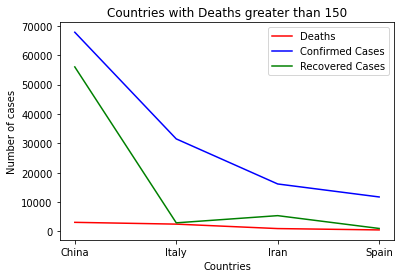

In [141]:
#create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150

cases_grtr_150 = covid_data[covid_data['Deaths'] > 150]
cases_grtr_150 = cases_grtr_150[['Deaths', 'Confirmed','Recovered','Country/Region']]
plt.plot(cases_grtr_150['Country/Region'], cases_grtr_150['Deaths'], color = 'red', label = "Deaths")
plt.plot(cases_grtr_150['Country/Region'], cases_grtr_150['Confirmed'], color = 'blue', label='Confirmed Cases')
plt.plot(cases_grtr_150['Country/Region'], cases_grtr_150['Recovered'], color = 'green', label='Recovered Cases')
plt.xlabel('Countries')
plt.ylabel('Number of cases')
plt.title('Countries with Deaths greater than 150')
plt.legend(loc="upper right")
plt.show()

  Province/State  Deaths
0     California      12
1       Colorado       2
2        Florida       6
3        Georgia       1
4       Illinois       1


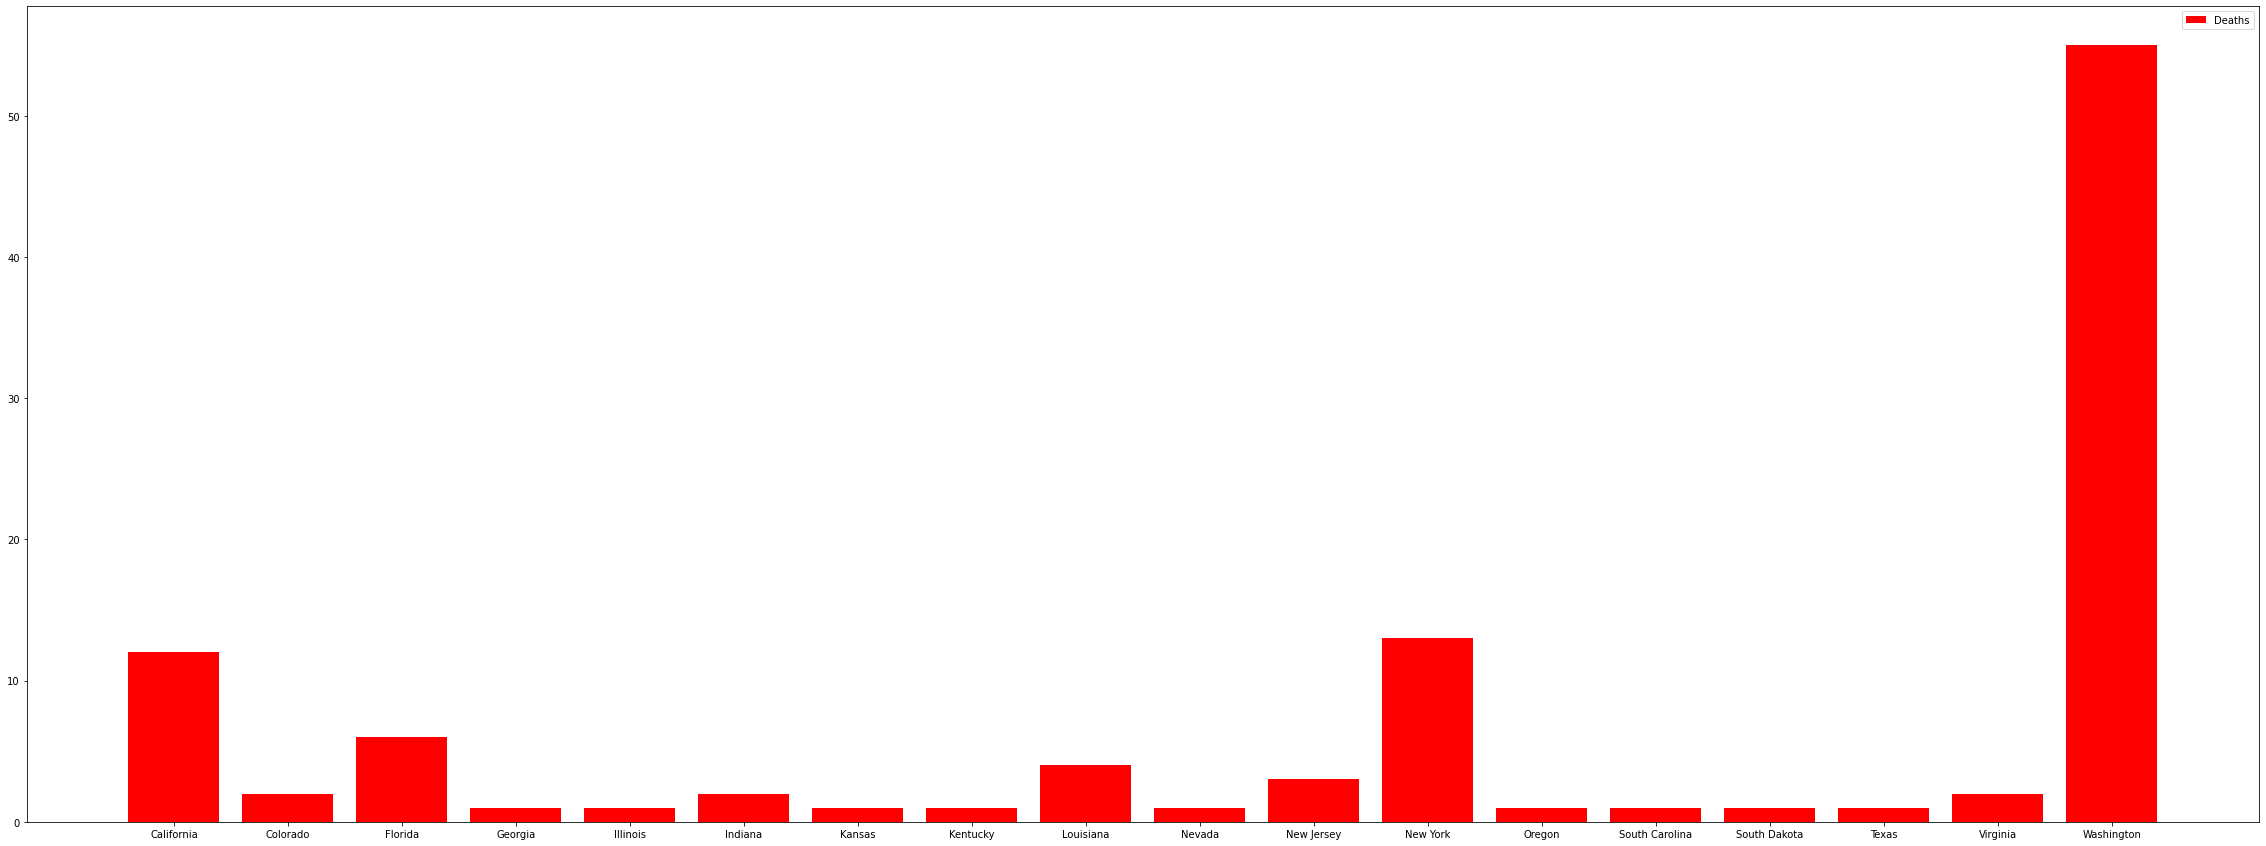

In [189]:
#Visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA.
usa_covid_data = covid_data[covid_data['Country/Region'] == "US"]
usa_covid_data = usa_covid_data[usa_covid_data['Deaths'] > 0]
usa_covid = usa_covid_data.groupby(['Province/State'])['Deaths'].sum().reset_index()
print(usa_covid.head())
plt.figure(figsize=(40, 15))
plt.bar(usa_covid['Province/State'], usa_covid['Deaths'], color = "red", label = "Deaths")
plt.legend(loc = "upper right")
plt.show()

In [ ]:
usa_covid_data = usa_covid_data.groupby(['Province/State'])['Deaths'].max()